# Analysis 1
## Text Corpus of GM Seed
This is the first of 3 analyses of corpus linguistic data related to ecological themes. This corpus consists of articles and webpages representing different perspectives on Genetically Modified (GM) Seed. The data was collected manually using a search engine. Resulting webpages were then determined as represening either anti-GM or pro-GM seed perspectives. The text was then cleaned and saved in 2 separate files: **anti_gmo.txt** and **pro-gmo.txt**. 

Links to raw data (on GitHub):

[anti_gmo.txt](https://github.com/craigmateo/multilevel_corpus/blob/master/Analysis_1/corpus/anti_gmo.txt), [pro_gmo.txt](https://github.com/craigmateo/multilevel_corpus/blob/master/Analysis_1/corpus/pro_gmo.txt)

### Pre-processing

The code below reads the 2 *txt* files and does preprocessing on the text. The preprocessing consists of:

1. **Noise removal** (removal of punctuation, special characters, digits)
2. **Normalization** (stemming, lemmatization, removal of stopwords) 

Exceprts from the each preprocessed subcorpus are then printed.

In [1]:
# Open the anti_gmo.txt supcorpus
anti_file = open("C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\anti_gmo.txt", "r", encoding="UTF-8")
anti_lines = anti_file.readlines()
# Open the anti_gmo.txt supcorpus
pro_file = open("C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\pro_gmo.txt", "r", encoding="UTF-8")
pro_lines = pro_file.readlines()

anti_lines = [line[:-1] for line in anti_lines]
pro_lines = [line[:-1] for line in pro_lines] 

# Libraries for text preprocessing

import re
import nltk

#nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

#nltk.download('wordnet') 

from nltk.stem.wordnet import WordNetLemmatizer

##Creating a list of stop words

stop_words = set(stopwords.words("english"))

corpus_antiPRE = []
corpus_anti = []

for i in range(0, len(anti_lines)):
    #Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', anti_lines[i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    corpus_antiPRE.append(text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus_anti.append(text)

corpus_proPRE = []
corpus_pro = []
for i in range(0, len(pro_lines)):
    #Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', pro_lines[i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    corpus_proPRE.append(text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus_pro.append(text)
  
anti_text = " ".join(corpus_anti)
pro_text = " ".join(corpus_pro)

print("Anti-GM Seed Excerpt:" + "\n" + "-"*30 + "\n" + anti_text[1000:1100])
print("\n")
print("Pro-GM Seed Excerpt:" + "\n" + "-"*30 + "\n" + pro_text[1000:1100])

Anti-GM Seed Excerpt:
------------------------------
e small scale farmer form cooperative wanted support department make attractive offer provide farmin


Pro-GM Seed Excerpt:
------------------------------
ogy frequently asked question gmos blame mass suicide indian farmer find suicide rate male indian fa


### Word Counts
Separate word counts are taken for each subcorpus. One count is taken with only noise removal and another with both noise removal and normalization. 

In [2]:
print("\n\t\t\t" + '****** Word Count ******')  

anti_textPre = " ".join(corpus_antiPRE)
pro_textPre = " ".join(corpus_proPRE)

num_words_antiPRE = format(len(anti_textPre.split()),",")
num_words_proPRE = format(len(pro_textPre.split()),",")

num_words_anti = format(len(anti_text.split()),",")
num_words_pro = format(len(pro_text.split()),",")

print("\n" + 'Noise Removal:' + "\n" + "-"*30)  

print("anti_gmo.txt: " + str(num_words_antiPRE))
print("pro_gmo.txt: " + str(num_words_proPRE))

print("\n" + 'Noise Removal & Normalization:' + "\n" + "-"*30)  
print("anti_gmo.txt: " + str(num_words_anti))
print("pro_gmo.txt: " + str(num_words_pro))


			****** Word Count ******

Noise Removal:
------------------------------
anti_gmo.txt: 224,883
pro_gmo.txt: 162,850

Noise Removal & Normalization:
------------------------------
anti_gmo.txt: 134,844
pro_gmo.txt: 101,238


### Url Domain Analysis

The files **urls_anti_gmo.txt** and **urls_pro_gmo.txt** list the urls used to collect the data. The two cells below parse the urls to determine distribution of top-level domains (tlds) and then plot the results in a pie chart. A random sample of 3 urls is also printed. 

The plot clearly shows that the **anti_gmo.txt** consists of more **.org** domains and the **pro_gmo.txt** consists of more **.com** domains. This is might suggest that the anti_gmo data is more likely to come from NGOs or non-corporate institutions. 

In [3]:
# Open the anti
anti_urls = open("C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\urls_anti_gmo.txt", "r", encoding="UTF-8")
anti_urls_lines = anti_urls.readlines()

tld_file = open("C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\tlds.txt", "r", encoding="UTF-8")
tlds = tld_file.readlines()

import re
import matplotlib.pyplot as plt

tld_counts_anti = []

for url in anti_urls_lines:
    
    ind = [m.start() for m in re.finditer('/', url)][2]

    if url[ind-4] == ".":
        tld_counts_anti.append(url[ind-3:ind])
    if url[ind-3] == ".":
        tld_counts_anti.append(url[ind-2:ind])

from collections import Counter
counts_anti = Counter(tld_counts_anti)

print("\n\t\t\t" + '****** Top-Level Domains (ANTI-GM) ******' + "\n")       

print("total urls: " + str(len(anti_urls_lines))+"\n" )

print("Random sample of anti_gm urls:")

from random import sample
chosen_anti = sample(anti_urls_lines, 3)
for url in chosen_anti:
    print(url[0:-1])

print("\n")
    
print("Top Level Domains (Anti-GM)" + "\n" + "----------------------------")

print(counts_anti.most_common())
plot1 = plt.pie([float(v) for v in counts_anti.values()], labels=[k for k in counts_anti], labeldistance=1.05, radius=1.8)



			****** Top-Level Domains (ANTI-GM) ******

total urls: 89

Random sample of anti_gm urls:
http://www.ipsnews.net/2008/07/agriculture-south-africa-small-farmers-pushed-to-plant-gm-seed
https://www.scientificamerican.com/article/genetically-modified-hawaii/
https://www.reuters.com/investigates/special-report/monsanto-india/


Top Level Domains (Anti-GM)
----------------------------
[('org', 39), ('com', 29), ('net', 5), ('edu', 4), ('ca', 3), ('uk', 2), ('nl', 2), ('br', 1), ('eu', 1), ('io', 1), ('za', 1)]



			****** Top-Level Domains (PRO-GM) ******

total urls: 91

Random sample of pro_gm urls:
http://www.isaaa.org/resources/publications/briefs/44/executivesummary/default.asp
https://www.foodinsight.org/GMOs-help-environment-food-technology
http://www.dupont.co.in/corporate-functions/our-approach/global-challenges/food.html


Top Level Domains (Pro-GM)
----------------------------
[('com', 50), ('org', 25), ('edu', 5), ('ca', 3), ('uk', 2), ('gov', 1), ('net', 1), ('cl', 1), ('in', 1), ('au', 1), ('ie', 1)]


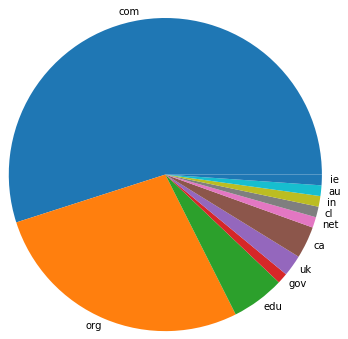

In [4]:

pro_urls = open("C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\urls_pro_gmo.txt", "r", encoding="UTF-8")
pro_urls_lines = pro_urls.readlines()

tld_counts_pro = []

for url in pro_urls_lines:
    
    ind = [m.start() for m in re.finditer('/', url)][2]

    if url[ind-4] == ".":
        tld_counts_pro.append(url[ind-3:ind])
    if url[ind-3] == ".":
        tld_counts_pro.append(url[ind-2:ind])

print("\n\t\t\t" + '****** Top-Level Domains (PRO-GM) ******' + "\n")        

print("total urls: " + str(len(pro_urls_lines))+"\n" )

print("Random sample of pro_gm urls:")

from random import sample
chosen_pro = sample(pro_urls_lines, 3)
for url in chosen_pro:
    print(url[0:-1])
    
print("\n")       

counts_pro = Counter(tld_counts_pro)

print("Top Level Domains (Pro-GM)" + "\n" + "----------------------------")

print(counts_pro.most_common())
import matplotlib.pyplot as pyplot
plot2 = plt.pie([float(v) for v in counts_pro.values()], labels=[k for k in counts_pro], labeldistance=1.05, radius=1.8)


### Keywords and Top n-Grams

           Word  Freq
0          seed  1749
1          food  1678
2          crop  1316
3            gm  1205
4    indigenous  1142
5        farmer  1107
6        people  1001
7      monsanto   656
8         right   630
9   traditional   608
10        plant   540
11          use   510
12         also   499
13         land   483
14  genetically   468
15        maize   465
16     cultural   454
17      company   424
18    community   416
19         corn   416


[Text(0, 0, 'seed'),
 Text(0, 0, 'food'),
 Text(0, 0, 'crop'),
 Text(0, 0, 'gm'),
 Text(0, 0, 'indigenous'),
 Text(0, 0, 'farmer'),
 Text(0, 0, 'people'),
 Text(0, 0, 'monsanto'),
 Text(0, 0, 'right'),
 Text(0, 0, 'traditional'),
 Text(0, 0, 'plant'),
 Text(0, 0, 'use'),
 Text(0, 0, 'also'),
 Text(0, 0, 'land'),
 Text(0, 0, 'genetically'),
 Text(0, 0, 'maize'),
 Text(0, 0, 'cultural'),
 Text(0, 0, 'company'),
 Text(0, 0, 'community'),
 Text(0, 0, 'corn')]

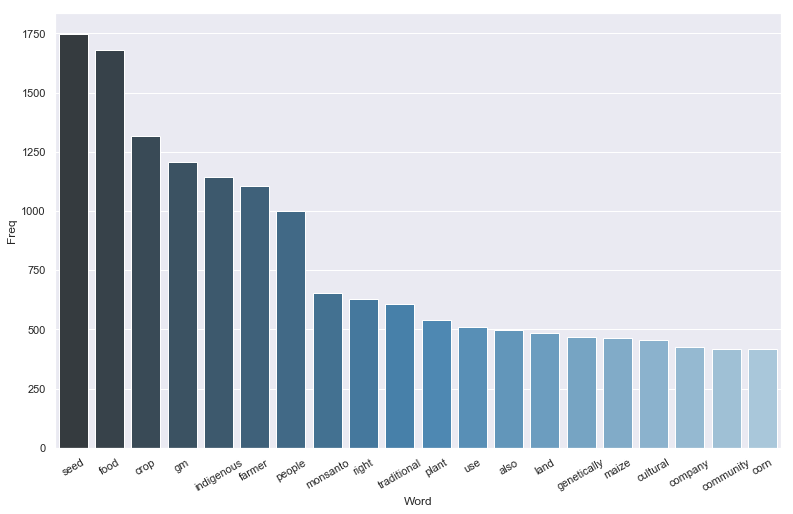

In [5]:
# code adapted from https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus_anti)

list(cv.vocabulary_.keys())[:10]

import pandas

#Most frequently occuring words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot

top_words = get_top_n_words(corpus_anti, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

print(top_df)

#Barplot of most freq words

import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df,  palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=30)

          Word  Freq
0         crop  1979
1           gm  1977
2           ha  1120
3       impact   991
4   technology   712
5      million   708
6          use   688
7         food   685
8           ht   666
9       farmer   639
10     soybean   627
11   herbicide   618
12        year   617
13      cotton   566
14        cost   507
15        farm   498
16      carbon   498
17       yield   486
18        seed   469
19     country   456


[Text(0, 0, 'crop'),
 Text(0, 0, 'gm'),
 Text(0, 0, 'ha'),
 Text(0, 0, 'impact'),
 Text(0, 0, 'technology'),
 Text(0, 0, 'million'),
 Text(0, 0, 'use'),
 Text(0, 0, 'food'),
 Text(0, 0, 'ht'),
 Text(0, 0, 'farmer'),
 Text(0, 0, 'soybean'),
 Text(0, 0, 'herbicide'),
 Text(0, 0, 'year'),
 Text(0, 0, 'cotton'),
 Text(0, 0, 'cost'),
 Text(0, 0, 'farm'),
 Text(0, 0, 'carbon'),
 Text(0, 0, 'yield'),
 Text(0, 0, 'seed'),
 Text(0, 0, 'country')]

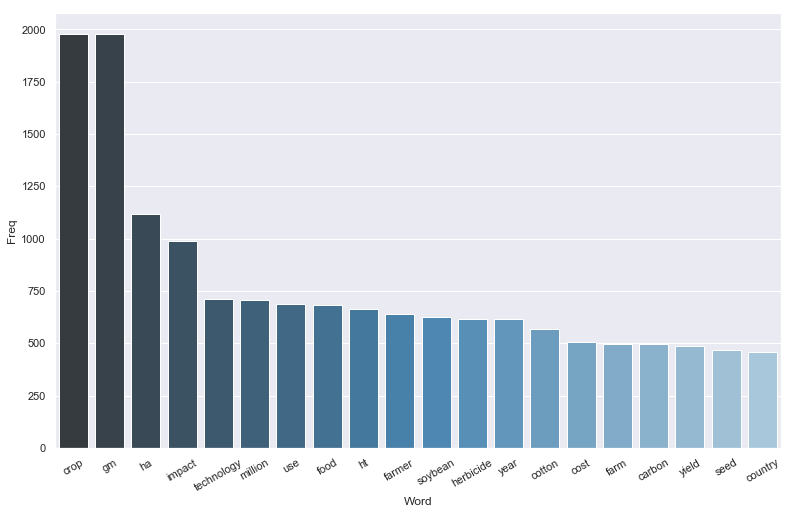

In [6]:
X=cv.fit_transform(corpus_pro)

list(cv.vocabulary_.keys())[:10]

#Convert most freq words to dataframe for plotting bar plot
top_wordsPRO = get_top_n_words(corpus_pro, n=20)
top_dfPRO = pandas.DataFrame(top_wordsPRO)
top_dfPRO.columns=["Word", "Freq"]

print(top_dfPRO)

#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g1 = sns.barplot(x="Word", y="Freq", data=top_dfPRO,  palette="Blues_d")
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)

                   Bi-gram  Freq
0        indigenous people   576
1                  gm crop   389
2     genetically modified   298
3         food sovereignty   164
4                 per cent   159
5                   non gm   147
6         traditional food   141
7   genetically engineered   129
8           indicator area   114
9                 http www   112
10           food security   111
11   biocultural diversity   104
12            united state    92
13              right food    80
14             food system    79
15   traditional knowledge    77
16    indigenous community    72
17                   et al    72
18                 non gmo    70
19         food production    67


[Text(0, 0, 'indigenous people'),
 Text(0, 0, 'gm crop'),
 Text(0, 0, 'genetically modified'),
 Text(0, 0, 'food sovereignty'),
 Text(0, 0, 'per cent'),
 Text(0, 0, 'non gm'),
 Text(0, 0, 'traditional food'),
 Text(0, 0, 'genetically engineered'),
 Text(0, 0, 'indicator area'),
 Text(0, 0, 'http www'),
 Text(0, 0, 'food security'),
 Text(0, 0, 'biocultural diversity'),
 Text(0, 0, 'united state'),
 Text(0, 0, 'right food'),
 Text(0, 0, 'food system'),
 Text(0, 0, 'traditional knowledge'),
 Text(0, 0, 'indigenous community'),
 Text(0, 0, 'et al'),
 Text(0, 0, 'non gmo'),
 Text(0, 0, 'food production')]

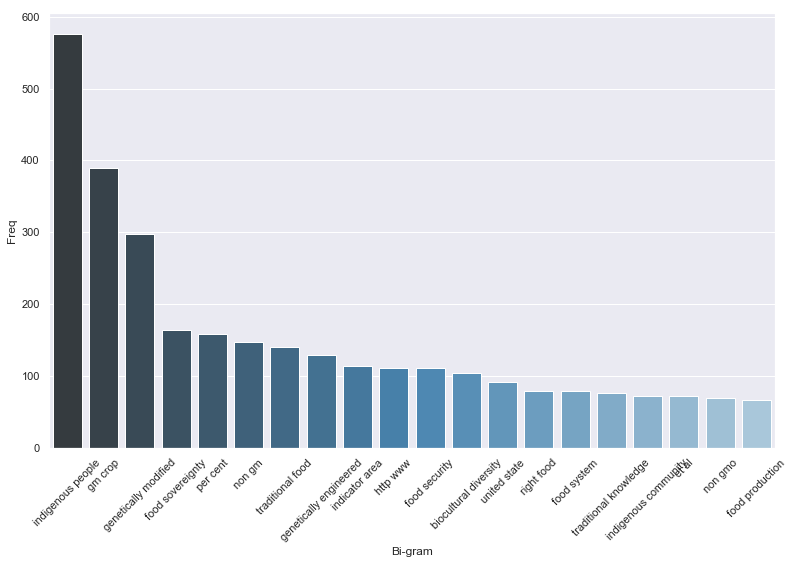

In [7]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus_anti, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]

print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                   Bi-gram  Freq
0                    gm ht   569
1                  gm crop   512
2                    gm ir   277
3                    et al   252
4              farm income   241
5             pg economics   209
6              crop impact   200
7            economics ltd   199
8     genetically modified   182
9                field eiq   175
10                   ha ha   162
11              ht soybean   158
12            biotech crop   138
13              million kg   136
14    environmental impact   134
15       active ingredient   129
16             cost saving   124
17        national academy   122
18  genetically engineered   121
19                  eiq ha   120


[Text(0, 0, 'gm ht'),
 Text(0, 0, 'gm crop'),
 Text(0, 0, 'gm ir'),
 Text(0, 0, 'et al'),
 Text(0, 0, 'farm income'),
 Text(0, 0, 'pg economics'),
 Text(0, 0, 'crop impact'),
 Text(0, 0, 'economics ltd'),
 Text(0, 0, 'genetically modified'),
 Text(0, 0, 'field eiq'),
 Text(0, 0, 'ha ha'),
 Text(0, 0, 'ht soybean'),
 Text(0, 0, 'biotech crop'),
 Text(0, 0, 'million kg'),
 Text(0, 0, 'environmental impact'),
 Text(0, 0, 'active ingredient'),
 Text(0, 0, 'cost saving'),
 Text(0, 0, 'national academy'),
 Text(0, 0, 'genetically engineered'),
 Text(0, 0, 'eiq ha')]

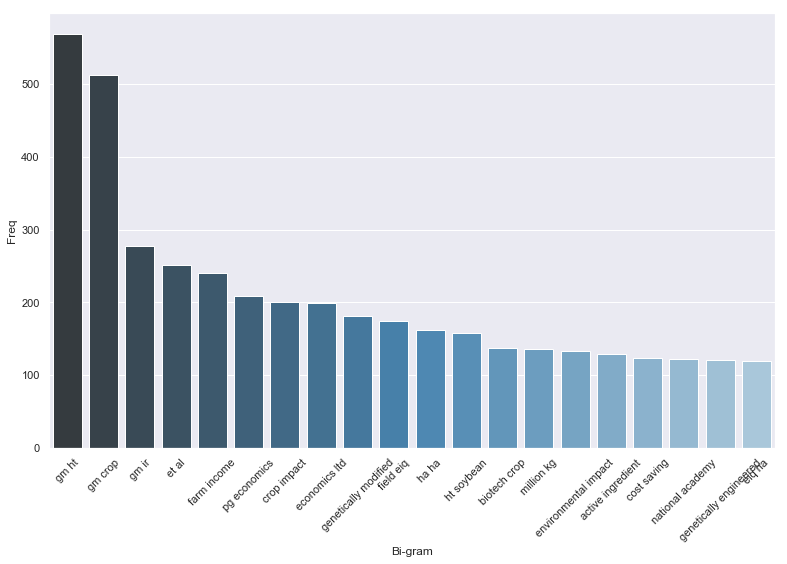

In [8]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_wordsPRO = get_top_n2_words(corpus_pro, n=20)
top2_dfPRO = pandas.DataFrame(top2_wordsPRO)
top2_dfPRO.columns=["Bi-gram", "Freq"]

print(top2_dfPRO)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_dfPRO, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                         Tri-gram  Freq
0   genetically modified organism    51
1       genetically modified seed    48
2   biocultural diversity toolkit    44
3       genetically modified crop    42
4       genetically modified food    38
5                     non gm crop    37
6          agro ecological system    36
7            food agro ecological    34
8                 growing gm crop    32
9                anti gm activism    31
10        indigenous people right    29
11    genetically engineered food    28
12    genetically engineered crop    28
13      food sovereignty critical    28
14         nd global consultation    27
15    intellectual property right    27
16  sovereignty critical dialogue    27
17             gm activism mexico    26
18        right indigenous people    25
19       activism mexico colombia    25


[Text(0, 0, 'genetically modified organism'),
 Text(0, 0, 'genetically modified seed'),
 Text(0, 0, 'biocultural diversity toolkit'),
 Text(0, 0, 'genetically modified crop'),
 Text(0, 0, 'genetically modified food'),
 Text(0, 0, 'non gm crop'),
 Text(0, 0, 'agro ecological system'),
 Text(0, 0, 'food agro ecological'),
 Text(0, 0, 'growing gm crop'),
 Text(0, 0, 'anti gm activism'),
 Text(0, 0, 'indigenous people right'),
 Text(0, 0, 'genetically engineered food'),
 Text(0, 0, 'genetically engineered crop'),
 Text(0, 0, 'food sovereignty critical'),
 Text(0, 0, 'nd global consultation'),
 Text(0, 0, 'intellectual property right'),
 Text(0, 0, 'sovereignty critical dialogue'),
 Text(0, 0, 'gm activism mexico'),
 Text(0, 0, 'right indigenous people'),
 Text(0, 0, 'activism mexico colombia')]

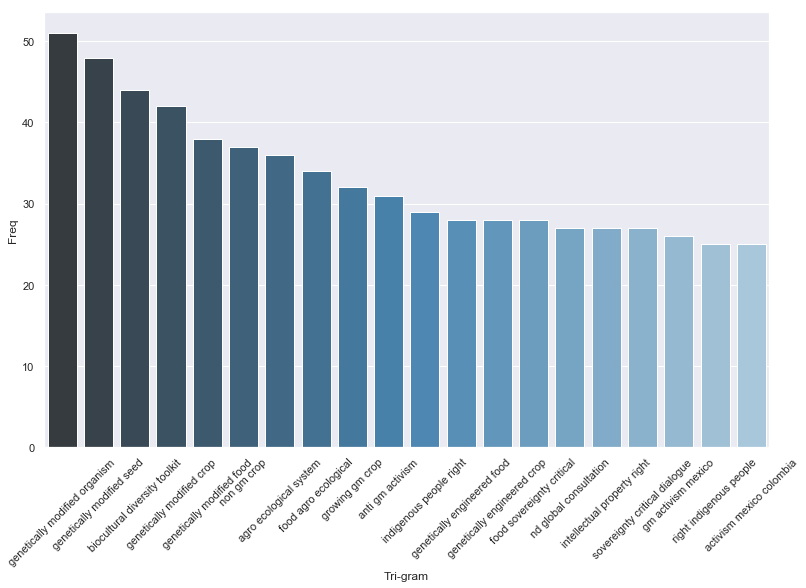

In [9]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus_anti, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0               pg economics ltd   199
1                 gm crop impact   198
2                  gm ht soybean   139
3                   field eiq ha    99
4                   gm ir cotton    95
5    genetically engineered crop    71
6                    using gm ht    71
7                impact using gm    69
8               farm income gain    65
9       national academy science    63
10                   gm ir maize    61
11                  kg carbon ha    61
12           farm income benefit    58
13   academy science engineering    54
14  science engineering medicine    54
15           income impact using    53
16                carbon ha year    52
17                   gm ht maize    51
18     genetically modified crop    49
19        national academy press    49


[Text(0, 0, 'pg economics ltd'),
 Text(0, 0, 'gm crop impact'),
 Text(0, 0, 'gm ht soybean'),
 Text(0, 0, 'field eiq ha'),
 Text(0, 0, 'gm ir cotton'),
 Text(0, 0, 'genetically engineered crop'),
 Text(0, 0, 'using gm ht'),
 Text(0, 0, 'impact using gm'),
 Text(0, 0, 'farm income gain'),
 Text(0, 0, 'national academy science'),
 Text(0, 0, 'gm ir maize'),
 Text(0, 0, 'kg carbon ha'),
 Text(0, 0, 'farm income benefit'),
 Text(0, 0, 'academy science engineering'),
 Text(0, 0, 'science engineering medicine'),
 Text(0, 0, 'income impact using'),
 Text(0, 0, 'carbon ha year'),
 Text(0, 0, 'gm ht maize'),
 Text(0, 0, 'genetically modified crop'),
 Text(0, 0, 'national academy press')]

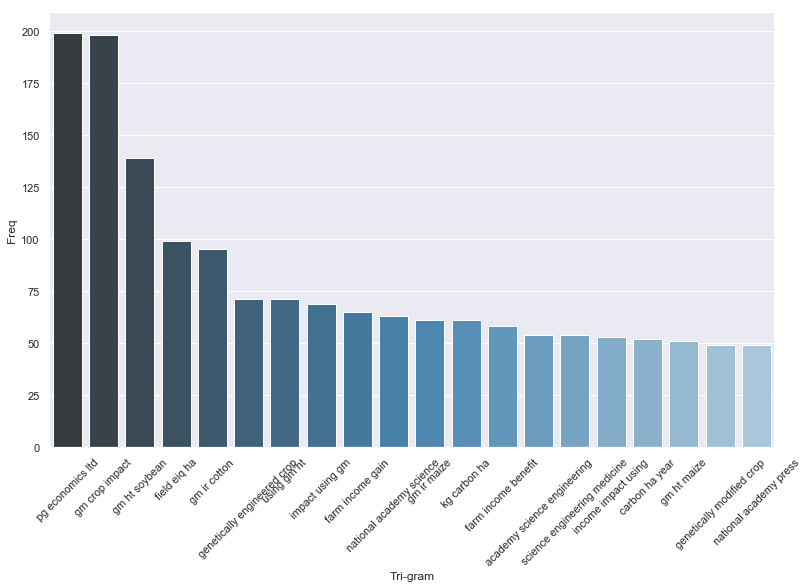

In [10]:
#Most frequently occuring Tri-grams

top3_wordsPRO = get_top_n3_words(corpus_pro, n=20)
top3_dfPRO = pandas.DataFrame(top3_wordsPRO)
top3_dfPRO.columns=["Tri-gram", "Freq"]
print(top3_dfPRO)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_dfPRO, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=45)

### Type-Token Ratio
Lexical diversity is calculated through the type-token ratio (TTR). For this, the non-preprocessed texts were used so TTR values could be compared with other corpora/texts.

In [11]:
#antiList = anti_text.split()
#proList = pro_text.split()

antiList = " ".join(anti_lines).split()
proList = " ".join(pro_lines).split()

# Yield successive n-sized 
# chunks from l. 
def divide_chunks(l, n): 
    # looping till length l 
        for i in range(0, len(l), n): 
            yield l[i:i + n] 

# How many elements each list should have 
n = 2000

x = list(divide_chunks(antiList, n)) 
y = list(divide_chunks(proList, n)) 


TTRs = []

for chunk in x:
    wordsUnique = []
    for word in chunk:
        if word not in wordsUnique:
            wordsUnique.append(word)
    ttr=len(wordsUnique)/len(chunk)
    TTRs.append(ttr)

TTRsPro = []

for chunk in y:
    wordsUnique = []
    for word in chunk:
        if word not in wordsUnique:
            wordsUnique.append(word)
    ttr=len(wordsUnique)/len(chunk)
    TTRsPro.append(ttr)

print("\n\t\t\t" + '****** Type-Token Ratio ******' + "\n")        

antiLD = sum(TTRs) / len(TTRs)
proLD = sum(TTRsPro) / len(TTRsPro)

print("anti-GM Corpus: " + str(round(antiLD,2)))
print("pro-GM Corpus:  " + str(round(proLD,2)))


			****** Type-Token Ratio ******

anti-GM Corpus: 0.45
pro-GM Corpus:  0.42


### Specialized Terminology

A more direct measure of the presence of scientific terminology is comparison of the corpora with a dictionary of scientific terms. To conduct such a comparison, a molecular biology glossary was used which comprised of 170 terms. For each subcorpora, counts were taken for the frequency of glossary terms. 

To account for the different sizes of corpora, frequencies are based on a random sample of 100,000 tokens from each corpus. The average frequency was then calculated over 100 random samples.

For each corpus we output the counts (e.g., {gene:445}) to determine precisely which molecular biology terms appeared in each subcorpus. 

In [12]:
import random
from collections import Counter

f= open("C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\allTerms.txt", "r", encoding="UTF-8")

terms = f.readlines()
allTerms = [x.lower() for x in terms]
allTerms= [x.replace('\n', '') for x in allTerms]

print(str(len(terms)) + " terms in the dictionary\n") 

from random import sample
print("Random sample of terms:")

chose_terms = sample(terms, 3)
for i in chose_terms:
    print("-"+i[0:-1])
print("\n")
      
subList = []

counts_anti = []
counts_pro = []

words_anti = []
words_pro = []
samples = []
size=100000
print("taking " + str(10)+ " samples of " +str(size) + " tokens..." + "\n")

def getCount(corpus, lst, words):

    for y in allTerms:
        if corpus.count(y) > 1:
            subList.append(y)

    i=0

    while i < 10:
        sampleRand=random.sample(corpus.split(), size)
        samples.append(sampleRand)
        i=i+1

    for sample in samples:
        count=0
        for z in subList:
            for q in sample:
                if z==q:
                    count=count+1
                    words.append(z)
        lst.append(count)

getCount(anti_textPre, counts_anti, words_anti)    
getCount(pro_textPre, counts_pro, words_pro)    
      
average = sum(counts_anti)/len(samples)
average_pro = sum(counts_pro)/len(samples)
print("average frequency (anti-GM): " +str(round(average,10)))
print("average frequency (pro-GM): " +str(round(average_pro,10)))

d1 = dict()
for i in words_anti:
  d1[i] = d1.get(i, 0) + 1

d2 = dict()
for i in words_pro:
  d2[i] = d2.get(i, 0) + 1

import operator
sorted_d1 = sorted(d1.items(), key=operator.itemgetter(1), reverse=True)
sorted_d2 = sorted(d2.items(), key=operator.itemgetter(1), reverse=True)

print("\n" + "Terms in the anti-GM corpus:")
print(sorted_d1)

print("\n" + "Terms in the pro-GM corpus:")
print(sorted_d2)

170 terms in the dictionary

Random sample of terms:
-Restriction enzyme
-Proto-oncogene
-Processing


taking 10 samples of 100000 tokens...

average frequency (anti-GM): 54.25
average frequency (pro-GM): 319.4

Terms in the anti-GM corpus:
[('gene', 515), ('expression', 117), ('genome', 79), ('hybridization', 76), ('processing', 61), ('insert', 38), ('restriction', 35), ('message', 34), ('sequence', 28), ('marker', 26), ('promoter', 16), ('translation', 16), ('library', 12), ('primer', 9), ('cap', 8), ('nt', 8), ('plasmid', 4), ('genotype', 3)]

Terms in the pro-GM corpus:
[('gene', 2266), ('nt', 2234), ('genome', 444), ('expression', 366), ('processing', 214), ('sequence', 168), ('insert', 124), ('message', 112), ('cap', 102), ('marker', 86), ('hybridization', 83), ('restriction', 70), ('promoter', 42), ('library', 17), ('screening', 17), ('translation', 16), ('lambda', 11), ('primer', 9), ('plasmid', 4), ('genotype', 3)]


The output above suggests that the pro-GM corpus has over 4 times the number of terms. However, from the output counts we see that 'NT' (abbr. for nucleotide) is disproportionate in the pro-GM corpus. To investigate we look at the context of where 'NT' appears in the text. 

Below we take a random sample of concordances of 'NT'. We see that is not used as an abbreviation for nucleotide; rather, it NT means frequently means no-till in this corpus. Moreover, we see that there are only 128 matches, far fewer than indicated in the counts above. This means that 'nt' (as a lowercase substring) was counted above where is had little to do with 'NT' meaning _nucleotide_.  

In [13]:
nt_concord = []

for i in range(0,len(proList)):
    if proList[i] == "NT":
        snippet = " ".join(proList[i-15:i+15])
        loc = snippet.index("NT")
        line = snippet[loc-25:loc+32]
        if line not in nt_concord:
            nt_concord.append(line)
            
print("count:" +str(len(nt_concord))+ "\n")
print('Random sample:' ) 
from random import sample
chosen_nt = sample(nt_concord, 10)
for i in chosen_nt:
    print(i)

count:128

Random sample:
ontent in the surface of NT soil to either increased carb
ty of SOC increase under NT is in the top 10 to 15 cm of 
in the crop area and the NT corn area; the average amount
stantial increase in the NT soybean area in the US (also 
n in these countries use NT systems. Across the three cou
It also found that using NT with winter cover crops resul
driver for the growth in NT soybean production has been t
 cropping systems. For a NT cropping system that received
o 80% of soil gains from NT practices can be maintained w
ed. Although the area of NT cotton has increased signific


In [14]:
allTerms.remove('nt')

subList = []

counts_anti = []
counts_pro = []

words_anti = []
words_pro = []

getCount(anti_textPre, counts_anti, words_anti)    
getCount(pro_textPre, counts_pro, words_pro)

average = sum(counts_anti)/len(samples)
average_pro = sum(counts_pro)/len(samples)

print("Results after removing 'NT' from the terms:\n")   
print("average frequency (anti-GM): " +str(round(average,10)))
print("average frequency (pro-GM): " +str(round(average_pro,10)))


Results after removing 'NT' from the terms:

average frequency (anti-GM): 79.45
average frequency (pro-GM): 207.15


To further assess the level of scientific and technical specialization, the same dictionary process was repeated with a glossary of agrochemicals. Common names of 2,498 herbicides and pesticides were collected and frequencies obtained for both sub corpora.

The results show that there is a much higher frequency of these terms in the pro-GM corpus (about 6 times as high). Also, we see that more variety of terms appear in the pro-GM corpus.

In [15]:
g= open("C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\herbPestNames.txt", "r", encoding="UTF-8")

termsHerb = g.readlines()
allTerms = [x.lower() for x in termsHerb]
allTerms= [x.replace('\n', '') for x in allTerms]

print(str(len(termsHerb)) + " terms in the dictionary\n") 

from random import sample
print("Random sample of terms:")

chose_termsHerb = sample(termsHerb, 3)
for i in chose_termsHerb:
    print("-"+i[0:-1])
print("\n")

subList = []

counts_anti = []
counts_pro = []

words_anti = []
words_pro = []

size=100000
print("taking " + str(10)+ " samples of " +str(size) + " tokens..." + "\n")

getCount(anti_textPre, counts_anti, words_anti)    
getCount(pro_textPre, counts_pro, words_pro)

average = sum(counts_anti)/len(samples)
average_pro = sum(counts_pro)/len(samples)
  
print("average frequency (anti-GM): " +str(round(average,10)))
print("average frequency (pro-GM): " +str(round(average_pro,10)))

d1 = dict()
for i in words_anti:
  d1[i] = d1.get(i, 0) + 1

d2 = dict()
for i in words_pro:
  d2[i] = d2.get(i, 0) + 1

import operator
sorted_d1 = sorted(d1.items(), key=operator.itemgetter(1), reverse=True)
sorted_d2 = sorted(d2.items(), key=operator.itemgetter(1), reverse=True)

print("\n" + "Terms in the anti-GM corpus:")
print(sorted_d1)

print("\n" + "Terms in the pro-GM corpus:")
print(sorted_d2)


2498 terms in the dictionary

Random sample of terms:
-fuberidazole
-disulfoton
-frontalin


taking 10 samples of 100000 tokens...

average frequency (anti-GM): 124.1166666667
average frequency (pro-GM): 390.5166666667

Terms in the anti-GM corpus:
[('glyphosate', 5782), ('glufosinate', 1012), ('atrazine', 324), ('dicamba', 152), ('ddt', 66), ('paraquat', 48), ('dep', 26), ('acc', 26), ('cma', 11)]

Terms in the pro-GM corpus:
[('glyphosate', 15424), ('glufosinate', 2648), ('atrazine', 884), ('clethodim', 412), ('chlorimuron', 350), ('fomesafen', 350), ('dicamba', 344), ('trifluralin', 330), ('acetochlor', 300), ('flumioxazin', 290), ('pendimethalin', 188), ('prometryn', 148), ('sulfentrazone', 136), ('metsulfuron', 118), ('imidacloprid', 110), ('metolachlor', 108), ('chlorpyrifos', 107), ('imazethapyr', 102), ('methomyl', 98), ('diafenthiuron', 87), ('cypermethrin', 85), ('acc', 78), ('acetamiprid', 74), ('ddt', 66), ('diuron', 62), ('dep', 52), ('paraquat', 48), ('metaflumizone', 48)

### Step 5 Concordances
Concordances of the words \textit{ecological} and \textit{biological} can provide insight into how living systems are referred to linguistically. 

In [16]:
anti_low = anti_text.lower()
anti_list = anti_low.split()
pro_low = pro_text.lower()
pro_list = pro_low.split()

eco_concord = []
eco_concord_pro = []
bio_concord = []
bio_concord_pro = []

def getConcord(targTerm, c1, c2):
    for i in range(0,len(anti_list)):
        if anti_list[i] == targTerm:
            snippet = " ".join(anti_list[i-15:i+15])
            loc = snippet.index(targTerm)
            line = snippet[loc-25:loc+32]
            if line not in c1:
                c1.append(line)

    for i in range(0,len(pro_list)):
        if pro_list[i] == targTerm:
            snippet = " ".join(pro_list[i-15:i+15])
            loc = snippet.index(targTerm)
            line = snippet[loc-25:loc+32]
            if line not in c2:
                c2.append(line)

getConcord("ecological", eco_concord, eco_concord_pro)
                
print("\n\t\t\t" + '****** Concordance lines of "ecological" ******' + "\n") 
            
print('ANTI-GM Corpus' + "\n--------------" + "\n")                     
            
print("Total unique lines: " + str(len(eco_concord)) + "\n")

print('Random sample:' + "\n") 
from random import sample
chosen_eco = sample(eco_concord, 14)
for i in chosen_eco:
    print(i)
                       
pro_low = pro_text.lower()
pro_list = pro_low.split()
        
print('\nPRO-GM Corpus' + "\n--------------" + "\n")            
            
print("Total unique lines: " + str(len(eco_concord_pro)) + "\n")

for i in eco_concord_pro:
    print(i)


			****** Concordance lines of "ecological" ******

ANTI-GM Corpus
--------------

Total unique lines: 107

Random sample:

aditional name food agro ecological process number speake
e adapted micro specific ecological condition adaptation 
ved within complex socio ecological adaptive system defin
igenous people food agro ecological system essential soun
d knowledge plant animal ecological process added ipes in
ys traditional food agro ecological system cultural ident
igenous people food agro ecological system right food foo
igenous people food agro ecological system need cultural 
shock like flood drought ecological farming model based b
sarily erode traditional ecological knowledge tek zarger 
ustomary law traditional ecological knowledge legal frame
 oil exploration logging ecological change including clim
onship culture food agro ecological system way interact n
people culture food agro ecological system way change one

PRO-GM Corpus
--------------

Total unique lines: 14

edness c

In [17]:
getConcord("biological", bio_concord, bio_concord_pro)
                
print("\n\t\t\t" + '****** Concordance lines of "biological" ******' + "\n") 
            
print('ANTI-GM Corpus' + "\n--------------" + "\n")                     
            
print("Total unique lines: " + str(len(bio_concord)) + "\n")

print('Random sample:' + "\n") 
from random import sample
chosen_bio = sample(bio_concord, 10)
for i in chosen_bio:
    print(i)
                       
pro_low = pro_text.lower()
pro_list = pro_low.split()
        
print('\nPRO-GM Corpus' + "\n--------------" + "\n")            
            
print("Total unique lines: " + str(len(bio_concord_pro)) + "\n")

for i in bio_concord_pro:
    print(i)


			****** Concordance lines of "biological" ******

ANTI-GM Corpus
--------------

Total unique lines: 94

Random sample:

 healthy planet requires biological diversity healthy cul
e food agricultural crop biological resource cultural pra
ervation sustainable use biological diversity taking also
l secretariat convention biological diversity chandler j 
tal knowledge convention biological diversity hlclep firs
ndigenous culture people biological productive resource s
ing statement convention biological diversity conference 
iority conservation rich biological resource including ce
ty rapidly lost parallel biological diversity largely res
ty supplement convention biological diversity cbd tie rio

PRO-GM Corpus
--------------

Total unique lines: 10

sustainable modification biological resource going much p
 really dad arguing need biological solution like gm redu
truction expand research biological science based program
enta innovative chemical biological solution aligning new
peed auto

Concordances of the word \textit{culture} can provide insight into the cultural context.

In [18]:
culture_concord = []
culture_concord_pro = []


getConcord("culture", culture_concord, culture_concord_pro)
                
print("\n\t\t\t" + '****** Concordance lines of "culture" ******' + "\n") 
            
print('ANTI-GM Corpus' + "\n--------------" + "\n")                     
            
print("Total unique lines: " + str(len(culture_concord)) + "\n")

print('Random sample:' + "\n") 
from random import sample
chosen_culture = sample(culture_concord, 10)
for i in chosen_culture:
    print(i)
                       
pro_low = pro_text.lower()
pro_list = pro_low.split()
        
print('\nPRO-GM Corpus' + "\n--------------" + "\n")            
            
print("Total unique lines: " + str(len(culture_concord_pro)) + "\n")

for i in culture_concord_pro:
    print(i)


			****** Concordance lines of "culture" ******

ANTI-GM Corpus
--------------

Total unique lines: 211

Random sample:

on afn included language culture land claim environment k
rk also considers effect culture way people manage asset 
ference diversity nature culture make u human washington 
irituality deeply rooted culture language history rationa
is original sl framework culture also included policy ins
n pastoralist livelihood culture privatization sub divisi
l region people distinct culture focus maize symbol cultu
 liberia indigenous rice culture disappear agricultural p
ention indigenous people culture food security well gover
 sacrilegious indigenous culture miliani b strask native 

PRO-GM Corpus
--------------

Total unique lines: 4

gy seed teach farmer new culture practice get completely 
op tool including tissue culture diagnostics genomics mol
formed cell grown tissue culture become plantlet eventual
icroorganism e g starter culture changed precisely random


In [19]:
indig_concord = []
indig_concord_pro = []


getConcord("indigenous", indig_concord, indig_concord_pro)
                
print("\n\t\t\t" + '****** Concordance lines of "indigenous" ******' + "\n") 
            
print('ANTI-GM Corpus' + "\n--------------" + "\n")                     
            
print("Total unique lines: " + str(len(indig_concord)) + "\n")

print('Random sample:' + "\n") 
from random import sample
chosen_indig = sample(indig_concord, 10)
for i in chosen_indig:
    print(i)
                       
pro_low = pro_text.lower()
pro_list = pro_low.split()
        
print('\nPRO-GM Corpus' + "\n--------------" + "\n")            
            
print("Total unique lines: " + str(len(indig_concord_pro)) + "\n")

for i in indig_concord_pro:
    print(i)


			****** Concordance lines of "indigenous" ******

ANTI-GM Corpus
--------------

Total unique lines: 784

Random sample:

ffect monsanto law union indigenous peasant movement file
mphasizes cultural value indigenous people agricultural f
 indicator could applied indigenous people modified versi
vance cultural indicator indigenous people leading langua
ed developed used farmer indigenous community chile gener
ay still maintained used indigenous people killing fish a
 hereinafter state world indigenous people han tammemagi 
o hopi san carlos apache indigenous nation shared traditi
nic soy anti gm activist indigenous resguardos like bogot
ht implies respect right indigenous people fundamental ac

PRO-GM Corpus
--------------

Total unique lines: 0



### Distribution of Geographic Entities
Some quantitative analysis provides a better view concentration and distribution of countries in the corpus. Using the Python software package *geotext* country and city names are extracted from each subcorpus. City names are counted only if the population is greater than 500,000. The cities are then referenced back to their countries and the resulting countries are counted and sorted for each subcorpus.

In [20]:
# import libraries for entity recognition and country codes
import sys
from geotext import GeoText
from iso3166 import countries
from tabulate import tabulate

# read corpus

anti_file = "C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\anti_gmo.txt"
pro_file = "C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\pro_gmo.txt"
cities_file = "C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\worldcities.csv"

freqMaster = {}
freq_anti = {} 
freq_pro = {} 
freqCities_anti = {}
freqCities_pro = {}
countByCit_anti = []
countByCit_pro = []
wc_anti = []
wc_pro = []
master_anti = []
master_pro = []
def geo(corpusFile, targList, wc, freq, freqCities, master):
    freqMaster = {}
    with open (corpusFile, "r", encoding="utf8") as f:
        lines = f.readlines()
        text=" ".join(lines)

        wordCount = len(text.split())/1000
        wc.append(wordCount)

        # get reference list of all country names (iso3166)

        refList = []

        for c in countries:
            refList.append(c[-1])

        # get countries and cities from corpus 

        places = GeoText(text)
        countriesAll = places.countries
        citiesAll = places.cities
        
        # import cities to cross-reference
        import pandas
        colnames = ["city","city_ascii","lat","lng","country","iso2","iso3","admin_name","capital","population","id"]
        data = pandas.read_csv(cities_file, names=colnames)
        names = data.city.tolist()
        country = data.country.tolist()
        population = data.population.tolist()
        
        countriesByCities = []

        for city in citiesAll:
            if city in names:
                ind=names.index(city)
                if float(population[ind]) > 500000:
                    #print(names[ind] + "," + " " + country[ind] +"," + " " + str(population[ind]))
                    countriesByCities.append(country[ind])

        # custom replace country names of with iso3166

        countriesAll = ["Bolivia, Plurinational State of" if x=="Bolivia" else x for x in countriesAll]
        countriesAll = ["United States of America" if x=="United States" else x for x in countriesAll]
        countriesByCities = ["United States of America" if x=="United States" else x for x in countriesByCities]
        countriesAll = ["Tanzania, United Republic of" if x=="Tanzania" else x for x in countriesAll]
        countriesAll = ["Venezuela, Bolivarian Republic of" if x=="Venezuela" else x for x in countriesAll]
        countriesByCities = ["Venezuela, Bolivarian Republic of" if x=="Venezuela" else x for x in countriesByCities]
        countriesAll = ["Viet Nam" if x=="Vietnam" else x for x in countriesAll]
        countriesAll = ["Syrian Arab Republic" if x=="Syria" else x for x in countriesAll]
        countriesAll = ["United Kingdom of Great Britain and Northern Ireland" if x=="United Kingdom" else x for x in countriesAll]
        countriesByCities = ["United Kingdom of Great Britain and Northern Ireland" if x=="United Kingdom" else x for x in countriesByCities]
        countriesAll = ["Korea, Republic of" if x=="South Korea" else x for x in countriesAll]
        countriesAll = ["Czechia" if x=="Czech Republic" else x for x in countriesAll]
        countriesAll = ["Russian Federation" if x=="Russia" else x for x in countriesAll]
        countriesAll = ["Micronesia, Federated States of" if x=="Micronesia" else x for x in countriesAll]
        
        if "Vatican" in countriesAll:
            countriesAll.remove("Vatican")
            
        # find country names in the corpus that do not correspond to an iso3166 name
        # print any suggestions for custom name replace

        noFits = []

        for x in countriesAll:
            if x not in refList:
                if x not in noFits:
                    noFits.append(x)

        if len(noFits)>0:
            print("No country code found for: ")
            for x in noFits:
                print(x)

        for x in noFits:
            for y in refList:
                if x in y:
                    print("try: " + y)
                    
        # create dict with country counts {"CAN":23, USA:89, ...} 
        # dict for both country mentions and city mentions

        for c in countriesAll: 

            item = countries.get(c)[2]

            if (item in freq): 
                freq[item] += 1
            else: 
                freq[item] = 1
            if (item in freqMaster): 
                freqMaster[item] += 1
            else: 
                freqMaster[item] = 1
                
                 
        for c in countriesByCities: 

            item = countries.get(c)[2]

            if (item in freqCities): 
                freqCities[item] += 1
            else: 
                freqCities[item] = 1
            if (item in freqMaster): 
                freqMaster[item] += 1
            else: 
                freqMaster[item] = 1
        
        m = countriesAll+countriesByCities
        for item in m:
            master.append(item)
        tab = []
        
        sorted_freqMaster = sorted(freqMaster.items(), key=operator.itemgetter(1), reverse=True)
        for key, value in sorted_freqMaster[0:10]:
            tab.append([countries.get(key)[0], round(value/wc[0],2)])
        
        print(tabulate(tab, headers=['Country', 'Freq. (per 1,000 words)']))
        
        for i in countriesByCities:
            targList.append(i)
            
        for key, value in sorted_freqMaster:
            if countries.get(key)[0] not in master:
                master.append(countries.get(key)[0])

print("\n\t\t" + '****** Countries in the Corpus ******' + "\n") 
            
print('ANTI-GM Corpus' + "\n")   
geo(anti_file, countByCit_anti, wc_anti, freq_anti, freqCities_anti, master_anti)

print("\n"+'PRO-GM Corpus' + "\n")   
geo(pro_file, countByCit_pro, wc_pro, freq_pro, freqCities_pro, master_pro)



		****** Countries in the Corpus ******

ANTI-GM Corpus

Country                     Freq. (per 1,000 words)
------------------------  -------------------------
Mexico                                         0.82
United States of America                       0.7
Canada                                         0.45
India                                          0.39
Colombia                                       0.3
Nepal                                          0.28
Argentina                                      0.27
Haiti                                          0.25
Brazil                                         0.2
Guatemala                                      0.17

PRO-GM Corpus

Country                     Freq. (per 1,000 words)
------------------------  -------------------------
Canada                                         1.04
Argentina                                      0.91
United States of America                       0.77
Brazil                                       

In [21]:
import country_converter as cc

def nsSplit(freq, wc, freqCities, countByCit):
    cont = cc.convert(names = countByCit, to = 'UNregion')
    globNorth = 0
    globSouth = 0

    for c in cont:
        if c=="Northern America" or "Europe" in c:
            globNorth=globNorth+1
        else:
            globSouth=globSouth+1
            
    tab = []
    tab.append([round(100*globNorth/len(cont),2), round(100*globSouth/len(cont),2)])

    print(tabulate(tab, headers=['North (%)', 'South (%)']))

    ## get variation coefficient ##

    import statistics 

    # calculating deviation and variance
    sample = [] 
    countryFreqs = freq.values()

    for i in countryFreqs:
        sample.append(i/wc[0])

    mean = sum(sample)/len(sample)
    stdev = statistics.stdev(sample)
    coeff =stdev/mean

    # Prints standard deviation 
    # xbar is set to default value of 1 
    stddev = statistics.stdev(sample)
    print("\n"+"For the countries: ")
    print("Standard Deviation is % s " % (round(stddev,2))) 
    print("The coefficient of variation (CV) is " +  str(round(coeff,2)) +  "\n") 

    sample2 = [] 

    cityFreqs = freqCities.values()

    for i in cityFreqs:
        sample2.append(i/wc[0])

    mean2 = sum(sample2)/len(sample2)
    stdev2 = statistics.stdev(sample2)
    coeff2=stdev2/mean2

print("\n\t\t" + '****** Geographic Split in the Corpus ******' + "\n") 
            
print('ANTI-GM Corpus' + "\n")       
nsSplit(freq_anti, wc_anti, freqCities_anti, countByCit_anti)

print('\nPRO-GM Corpus' + "\n")       
nsSplit(freq_pro, wc_pro, freqCities_pro, countByCit_pro)


		****** Geographic Split in the Corpus ******

ANTI-GM Corpus

  North (%)    South (%)
-----------  -----------
      61.99        38.01

For the countries: 
Standard Deviation is 0.12 
The coefficient of variation (CV) is 1.87


PRO-GM Corpus

  North (%)    South (%)
-----------  -----------
      87.39        12.61

For the countries: 
Standard Deviation is 0.21 
The coefficient of variation (CV) is 1.75



In [22]:
## calculating diversity of data

def divers(freqCities, wc):
    countryFreqs = []
    for i in freqCities.values():
        countryFreqs.append(i/wc)
    sumFreqs=sum(countryFreqs)
    n=len(countryFreqs)
    #average=sum(countryFreqs)/len(countryFreqs)

    proportions=[]

    for i in countryFreqs:
        proportions.append(i/sumFreqs)
    #print(proportions)

    import math

    listofzeros = [0] * (195-len(proportions))

    calcs = []

    for p in proportions:
        calc = p*(math.log(p,2.0))
        calcs.append(calc)
    final=listofzeros+calcs
    H1=-1*sum(final)
    D1=(math.log(n,2.0))-H1
    #rint(round(H1,2))
    #rint(round(D1,2))
    print(round(H1/(math.log(195)),2))
print("\n\t\t" + "****** Shannon's Diversity Index ******" + "\n")     
print('ANTI-GM Corpus') 
divers(freqCities_anti,wc_anti[0]*1000)

print('\nPRO-GM Corpus') 
divers(freqCities_pro,wc_pro[0]*1000)



		****** Shannon's Diversity Index ******

ANTI-GM Corpus
0.71

PRO-GM Corpus
0.36


### Temporal Horizons & Historical Context
Cultural dimensions can also be explored through the historical and temporal context of the corpus. Cultural memory is inter-generational and historical. Therefore, based on the premise that the anti-GM corpus is imbued with expressions of cultural identity, one might expect the time span of this subcorpus to be more expansive. 

An general overview of time span can be obtained through concordances of *century* and *centuries*.

In [23]:
anti_file = "C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\anti_gmo.txt"
pro_file = "C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\pro_gmo.txt"

centur_concord = []
centur_concord_pro = []

def getConcordWildcard(file, targTerm, c1):

    with open (file, "r", encoding="utf8") as f:
        lines = f.readlines()
        text=" ".join(lines)
        low = text.lower()
        listsp = low.split()

        for i in range(0,len(listsp)):
            if targTerm in listsp[i]:
                snippet = " ".join(listsp[i-15:i+15])
                loc = snippet.index(targTerm)
                line = snippet[loc-25:loc+32]
                if line not in c1:
                    c1.append(line)

getConcordWildcard(anti_file, 'centur', centur_concord)
print("\n\t\t\t" + '****** Concordance lines of "centur*" ******' + "\n") 
            
print('ANTI-GM Corpus' + "\n--------------" + "\n")                     
            
print("Total unique lines: " + str(len(centur_concord)) + "\n")

for i in centur_concord:
    print(i)
    
getConcordWildcard(pro_file, 'centur', centur_concord_pro)
print('\nANTI-GM Corpus' + "\n--------------" + "\n")                     
            
print("Total unique lines: " + str(len(centur_concord_pro)) + "\n")

for i in centur_concord_pro:
    print(i)


			****** Concordance lines of "centur*" ******

ANTI-GM Corpus
--------------

Total unique lines: 34

e been enriched over the centuries through the abundant b
ict (spanish in the 16th century, expropriation of land i
economies since the 16th century, they have retained exte
hich are the products of centuries of deliberate breeding
eations that encapsulate centuries of historical events a
odels at the turn of the century: individual property mod
nt in panama in the 21st century. bioscience 51: 389-398.
e first half of the 20th century, seeds were overwhelming
llion by the turn of the century and that almost 1 billio
eceived in the last half century. sustainable agriculture
 that have been used for centuries. no-till farming is pr
lture over the course of centuries, europeans have found 
nineteenth and twentieth centuries in europe, the man-mad
in it. in mid-nineteenth century america, the natural won
. in the late nineteenth century, the preservation of unt
nforced in the twentieth 

To further quantify the temporal horizons, all years mentioned in the corpus were collected an analyzed. This involved querying for tokens beginning with *20*, *19*, *18*, *17*. In addition, the *centur* query from above was also included. The result was a list of over 5,000 concordances. This list was then cleaned, both manually and using Python (omitted here for brevity). The manual cleaning involved removing any numbers or lines that did not refer to years. Also, references to centuries were converted to the midpoint year (*19th century* --> 1850). The programmatic cleaning removed non-numeric characters (e.g. *1990s --> 1990*); also, hyphenated year-spans were converted to the midpoint (*1990-2000 --> 1995*). The years were segmented by subcorpus and plotted using Python.

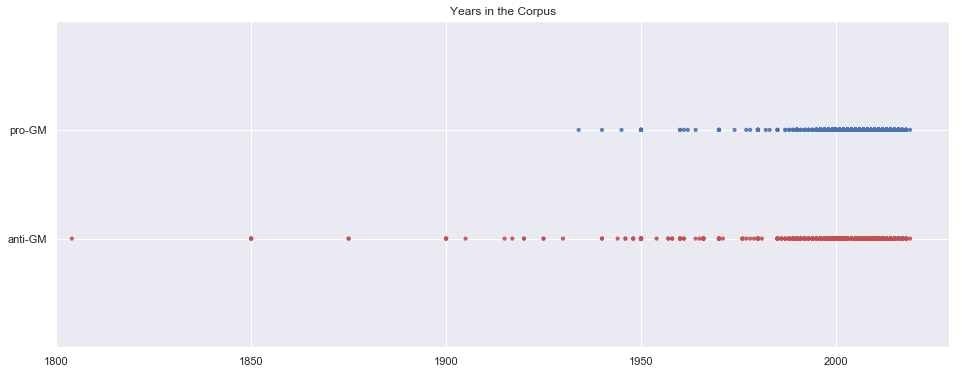

In [24]:
from operator import itemgetter
from collections import defaultdict

yearsf = "C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\xseries.csv"


def plot_timeline(dataset, **kwargs):
    outpath = kwargs.pop('savefig', None)  # Save the figure as an SVG
    colors  = kwargs.pop('colors', {})     # Plot the colors for the series.
    series  = set([])                      # Figure out the unique series

    # Bring the data into memory and sort
    dataset = sorted(list(dataset), key=itemgetter(0))

    # Make a first pass over the data to determine number of series, etc.
    for _, source, category in dataset:
        series.add(source)
        if category not in colors:
            colors[category] = 'k'

    # Sort and index the series
    series  = sorted(list(series))

    # Create the visualization
    x = []  # Scatterplot X values
    y = []  # Scatterplot Y Values
    c = []  # Scatterplot color values

    # Loop over the data a second time
    for timestamp, source, category in dataset:
        x.append(timestamp)
        y.append(series.index(source))
        c.append(colors[category])

    plt.figure(figsize=(16,6))
    plt.title(kwargs.get('title', "Years in the Corpus"))
    plt.ylim((-1,len(series)))
    plt.xlim((1800, dataset[-1][0]+10))
    plt.yticks(range(len(series)), series)
    plt.scatter(x, y, color=c, alpha=0.85, s=10)

    if outpath:
        return plt.savefig(outpath, format='svg', dpi=1600)

    return plt
import csv
if __name__ == '__main__':
    colors = {'red': 'r', 'blue': 'b', 'green': 'g'}
    with open(yearsf, 'r') as f:
        reader = csv.reader(f)
        plt = plot_timeline([
            (float(row[0]), row[1], row[2])
            for row in reader
        ], colors=colors)
        plt.show()


### Concordances of *income*
Now we explore the hypothesis that socio-economic divides are reflected in corpus data. The key terms analysis suggested that *income* was a much more prominent concept in the pro-GM data. To explore this, we can look at concordances.

In [25]:
income_concord = []
income_concord_pro = []

getConcord("income", income_concord, income_concord_pro)
                
print("\n\t\t\t" + '****** Concordance lines of "income" ******' + "\n") 
            
print('ANTI-GM Corpus' + "\n--------------" + "\n")                     
            
print("Total unique lines: " + str(len(income_concord)) + "\n")

print('Random sample:' + "\n") 
from random import sample
chosen_income = sample(income_concord, 10)
for i in chosen_income:
    print(i)
                           
print('\nPRO-GM Corpus' + "\n--------------" + "\n")            
            
print("Total unique lines: " + str(len(income_concord_pro)) + "\n")

print('Random sample:' + "\n") 
from random import sample
chosen_income = sample(income_concord, 10)
for i in chosen_income:
    print(i)




			****** Concordance lines of "income" ******

ANTI-GM Corpus
--------------

Total unique lines: 58

Random sample:

 price hurt local farmer income disrupted usual pattern r
 setting level necessary income also sought ensure farmer
dicator health education income etc disaggregated indigen
ubsidy record level farm income majority u farmer still l
rain price reducing farm income raising farm programme ex
find new way offset lost income making non gmo niche crop
d city percent reporting income migrant work distant farm
overall effect crop farm income negative feedback farmer 
any getting flooded call income hungry farmer midwest loo
ed crop yield time lower income time lower mexico gmo cor

PRO-GM Corpus
--------------

Total unique lines: 237

Random sample:

organic farmer lost sale income struggling practically ec
ood security enhancement income nepalese farmer newspaper
l definition poverty low income poverty mean lack access 
 price hurt local farmer income disrupted usual patter

### Collocates of *corporate*

Collocate of the word *corporate* are also a telling indication of economic context in the anti-GM corpus. The anti-GM corpus was searched for collocates that immediately followed the word *corporate* (1R) and were repeated multiple times (minimum frequency 2).

In [26]:
corporate_concord = []
corporate_concord_pro = []
corp_anti = []
corp_pro = []
unique = []
getConcordWildcard(anti_file, 'corporate', corporate_concord) 
getConcordWildcard(pro_file, 'corporate', corporate_concord_pro) 

def getCorp(lst1, lst2):
    for i in lst1:
        if len(i) > 1:
            j=i.split()
            if("corporate" in j):
                ind = j.index("corporate")
                s = j[ind+1]
                s = re.sub(r'[^\w\s]','',s)
                lst2.append(s)

    d1a = dict()
    for i in lst2:
      d1a[i] = d1a.get(i, 0) + 1

    sorted_d1a = sorted(d1a.items(), key=operator.itemgetter(1), reverse=True)
    out = []
    #print(sorted_d1a)
    for key, value in sorted_d1a:
        if value>1:
            out.append([key, value])
        if value==1:
            unique.append([key, value])
    print(tabulate(out, headers=['Collocate', 'Freq.']))
           
print("\n\t\t\t" + '****** Collocates of "corporate" ******' + "\n") 
            
print('ANTI-GM Corpus' + "\n")                     
       
print("Total unique lines: " + str(len(corporate_concord)) + "\n")
getCorp(corporate_concord, corp_anti)      
        
print('\nPRO-GM Corpus' + "\n")            
            
print("Total unique lines: " + str(len(corporate_concord_pro)) + "\n")      

getCorp(corporate_concord_pro, corp_pro)
for i in unique:
    print(i[0])


			****** Collocates of "corporate" ******

ANTI-GM Corpus

Total unique lines: 87

Collocate        Freq.
-------------  -------
sector              10
control              8
power                4
seed                 4
agriculture          3
sectors              2
greed                2
subsidies            2
takeover             2
consolidation        2
concentration        2

PRO-GM Corpus

Total unique lines: 23

Collocate      Freq.
-----------  -------
watch              2
entities
agribusiness
agricultural
grip
efforts
giants
affairs
pressure
battle
bodies
finances
watch
agrochemical
projects
executives
profit
interests
involvement
industrial
leaders
organizations
lobby
stakeholders
sponsors
funding
grant
line
applications
secrets
pricing
image
media
shills
evil
control
profit
domination
greed
sponsor


### Income Split
The previous analysis of country entities in the corpus suggested that a higher proportion of countries mentioned in the anti-corpus were from the Global South. This result points to possible economic differences between the two subcorpora. To further explore this hypothesis, GDP data was used. All countries mentioned in the corpus (including city mentions) were ranked according to GDP (nominal) per capita. Among all countries, the average rank, average GDP, and percentages in the top and bottom quartiles (according to GDP), were determined. 

In [27]:
gdp_file = "C:\\Users\\Craig\\Documents\\GitHub\\multilevel_corpus\\Analysis_1\\corpus\\gdp.csv"
import pandas
colnames1 = ["rank","country","gdp"]
data_gdp = pandas.read_csv(gdp_file, names=colnames1)

rank_gdp = data_gdp["rank"].tolist()
countries_gdp = data_gdp["country"].tolist()
gdp = data_gdp["gdp"].tolist()
countries_gdp = [w.replace('\xa0', '') for w in countries_gdp]
ranks = dict(zip(countries_gdp, rank_gdp))
gdps = dict(zip(countries_gdp, gdp))
quart = int(0.25*len(countries_gdp))

quartile_top = countries_gdp[0:quart]
quartile_bottom = countries_gdp[2*quart:4*quart]

def sumRanks(dic, master):

    keysC = []
    valuesC = []
    countr = []

    sorted_dic = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)
    for key, value in sorted_dic:
        keysC.append(countries.get(key)[0])
        valuesC.append(value)
        if countries.get(key)[0] not in countries_gdp:
            print(countries.get(key)[0])

    tot_dic = 0

    for c in master:
        tot_dic=tot_dic+int(ranks.get(c))
    print("avg rank: " + str(int(tot_dic/len(master))))

    tot_gdp = 0
    for c in master:
        #print(c)
        tot_gdp=tot_gdp+int(gdps.get(c))
        
    print("avg gdp " + str(round(tot_gdp/len(master),2)))
    
    count_top = 0
    count_bottom = 0
    for c in master:
        if c in quartile_top:
            count_top = count_top+1
        if c in quartile_bottom:
            count_bottom = count_bottom+1 
    print("% in top quartile: " + str(100*round(count_top/len(master),2)))
    print("% in bottom quartile: " + str(100*round(count_bottom/len(master),2)))
    #print(len(keysC))
    

print('ANTI-GM Corpus' + "\n")  
sumRanks(freq_anti, master_anti)

print("\n"+'PRO-GM Corpus' + "\n")  
sumRanks(freq_pro, master_pro)

ANTI-GM Corpus

avg rank: 90
avg gdp 20765.94
% in top quartile: 32.0
% in bottom quartile: 38.0

PRO-GM Corpus

avg rank: 81
avg gdp 22370.72
% in top quartile: 35.0
% in bottom quartile: 32.0


### Implications and Presuppositions

In [28]:
means_concord = []
means_concord_pro = []


def getConcordWildcard(file, targTerm, c1):

    with open (file, "r", encoding="utf8") as f:
        lines = f.readlines()
        text=" ".join(lines)
        low = text.lower()
        listsp = low.split()

        for i in range(0,len(listsp)):
            if targTerm in listsp[i]:
                snippet = " ".join(listsp[i-15:i+15])
                loc = snippet.index(targTerm)
                line = snippet[loc-45:loc+52]
                if line not in c1:
                    c1.append(line)


getConcordWildcard(anti_file, 'means', means_concord) 
getConcordWildcard(pro_file, 'means', means_concord_pro)           
print("\n\t\t\t" + '****** Concordance lines of "means" ******' + "\n") 
            
print('ANTI-GM Corpus' + "\n--------------" + "\n")                     
            
print("Total unique lines: " + str(len(means_concord)) + "\n")

print('Random sample:' + "\n") 
from random import sample
chosen_means = sample(means_concord, 10)
for i in chosen_means:
    print(i)
                           
print('\nPRO-GM Corpus' + "\n--------------" + "\n")            
            
print("Total unique lines: " + str(len(means_concord_pro)) + "\n")

#print('Random sample:' + "\n") 

chosen_meanspro = sample(means_concord_pro, 10)
for i in chosen_meanspro:
    print(i)


			****** Concordance lines of "means" ******

ANTI-GM Corpus
--------------

Total unique lines: 81

Random sample:

roved certain gm varieties for import, which means that bulk shipments containing mixtures of app
s not mean chemical free or gmo-free, but it means gmos are not used in the production. organic f
eeds modified in a lab are often touted as a means to boost agriculture and food security in afri
en using in their fields. here, control also means the right to reproduce seed. in sum, seed sove
erent genes inserted in different ways. this means that individual gm foods and their safety shou
fraying of the biocultural web of life. that means that the effort to protect, restore, and susta
14 biocultural diversity toolkit | bcd intro means weakening the whole fabric of life—the web of 
, production and eventually their land. this means they lose their food sovereignty," says mayet.
. what does this mean? well, to hawaiians it means that over 70 different chemicals have been spr

In [29]:
franken_concord = []
franken_concord_pro = []


def getConcordWildcard(file, targTerm, c1):

    with open (file, "r", encoding="utf8") as f:
        lines = f.readlines()
        text=" ".join(lines)
        low = text.lower()
        listsp = low.split()

        for i in range(0,len(listsp)):
            if targTerm in listsp[i]:
                snippet = " ".join(listsp[i-15:i+15])
                loc = snippet.index(targTerm)
                line = snippet[loc-45:loc+52]
                if line not in c1:
                    c1.append(line)


getConcordWildcard(anti_file, 'franken', franken_concord) 
getConcordWildcard(pro_file, 'franken', franken_concord_pro)           
print("\n\t\t\t" + '****** Concordance lines of "franken" ******' + "\n") 
            
print('ANTI-GM Corpus' + "\n--------------" + "\n")                     
            
print("Total unique lines: " + str(len(franken_concord)) + "\n")


for i in franken_concord:
    print(i)
                           
print('\nPRO-GM Corpus' + "\n--------------" + "\n")            
            
print("Total unique lines: " + str(len(franken_concord_pro)) + "\n")

#print('Random sample:' + "\n") 

for i in franken_concord_pro:
    print(i)


			****** Concordance lines of "franken" ******

ANTI-GM Corpus
--------------

Total unique lines: 4

avior.” when anti-gmo protesters talk about “frankenfood,” gmo advocates often interpret it as a 
lima, peru — are genetically modified crops “franken-foods” or the answer to global hunger and cl
areas dedicated exclusively to gm harvests, “franken-foods” are now an integral part of the globa
by monsanto. the imposition of transnational frankenseeds would mean an end to this richness and 

PRO-GM Corpus
--------------

Total unique lines: 2

enetics of what we eat does not produce the “frankenfood” monster some opponents claim – but is n
 pure and pristine, and to tinker with it is frankensteinian. it's making something that's pure d


In [36]:
anti_concord = []
anti_concord_pro = []


def getConcordWildcard(file, targTerm, c1):

    with open (file, "r", encoding="utf8") as f:
        lines = f.readlines()
        text=" ".join(lines)
        low = text.lower()
        listsp = low.split()

        for i in range(0,len(listsp)):
            if targTerm in listsp[i]:
                snippet = " ".join(listsp[i-15:i+15])
                loc = snippet.index(targTerm)
                line = snippet[loc-45:loc+52]
                if line not in c1:
                    c1.append(line)


getConcordWildcard(anti_file, 'anti-science', anti_concord) 
getConcordWildcard(pro_file, 'anti-science', anti_concord_pro)           
print("\n\t\t\t" + '****** Concordance lines of "anti-science" ******' + "\n") 
            
print('ANTI-GM Corpus' + "\n--------------" + "\n")                     
            
print("Total unique lines: " + str(len(anti_concord)) + "\n")


for i in anti_concord:
    print(i)
                           
print('\nPRO-GM Corpus' + "\n--------------" + "\n")            
            
print("Total unique lines: " + str(len(anti_concord_pro)) + "\n")

#print('Random sample:' + "\n") 

for i in anti_concord_pro:
    print(i)


			****** Concordance lines of "anti-science" ******

ANTI-GM Corpus
--------------

Total unique lines: 0


PRO-GM Corpus
--------------

Total unique lines: 3

ke hot pepper in the eyes and sour mouths of anti-science cults. so they go on to attack the mess
rld should wake up to destruction of gp. the anti-science crowd uses associations to substitute f
 what greenpeace is doing is damaging and is anti-science," roberts told the washington post. “gr
